In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

### 1. Load

In [2]:
data_file_path = "transactions.txt"  

# Read the data from the text file into a list
with open(data_file_path, "r") as file:
    json_data = file.readlines()

# Convert each JSON line into a Python dictionary
data_list = [json.loads(line.strip()) for line in json_data]

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)

# Now, 'df' contains your transaction data in a DataFrame
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [3]:
csv_file = df.to_csv('transaction.csv', index=False)
df = pd.read_csv('transaction.csv')
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


### Structure Of Data

In [4]:
df.shape

(786363, 29)

Number of records: 786363  
Number of columns: 29

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

- The columns echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd do not contain any information and contain only NaN values. Therefore, I have dropped these columns from the dataset.

In [6]:
columns_to_drop = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
# Drop the specified columns with 0 non-null values in place
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [8]:
df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
dtype: object

Out of the 23 features:  
3 - Boolean values (cardPresent, expirationDateKeyInMatch, isFraud)  
4 - Quantitative - Float values (creditLimit, availableMoney, transactionAmount, currentBalance)  
2 - Unique IDs - Int Values (Account Number, Customer ID)  
3 - DateTime - (transactionDateTime, currentExpDate, accountOpenDate, dateOfLastAddressChange)  
7 - Categorical - (merchant Name, acq Country, merchant Country Code, pos Entry Mode, pos Condition Code, merchant Category Code, Transaction Type)


### Summary Statistics

In [9]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,782309.000000,785954.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,9.049943,3.271980,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,16.774130,9.809023,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,2.000000,1.000000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,5.000000,1.000000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,9.000000,1.000000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,9998.000000,47498.810000


In [10]:
df[['creditLimit', 'availableMoney', 'transactionAmount','currentBalance']].describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


#### Count of Null Values 

In [11]:
na_df = df[df.isna().any(axis=1)]
na_df_count = len(na_df)

print("Total records : {}".format(len(df)))
print("Total records with missing values : {}\n".format(na_df_count))

print("Missing values for each attribute")
for idx,i in enumerate(df.isna().sum()):
    if i>0:
        print("{} : {}".format(df.columns[idx], i))

Total records : 786363
Total records with missing values : 9695

Missing values for each attribute
acqCountry : 4562
merchantCountryCode : 724
posEntryMode : 4054
posConditionCode : 409
transactionType : 698


#### Count of Unique Values

In [12]:
unique_counts = df.nunique()
unique_counts

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521862
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  3
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

#### Observations:
- There are 5000 unique customers in the dataset.  
- Capital One provides 10 different credit limits to customers.  
- The merchants are based out of 4 countries.  
- The merchants are categorized into 19 categories i.e food, transport, gym etc.  
- Transactions are categorized into Purchase, Reversal, Multi-Swipe.  
- Each transaction may take place with card present or without card present (online).  
- All transactions are categorized into Fraud or Normal.  

#### Distribution of Values for Categorical Features

In [13]:
df['creditLimit'].value_counts()

5000.0     201863
15000.0    139307
7500.0      97913
2500.0      75429
20000.0     68629
10000.0     56889
50000.0     48781
1000.0      36430
250.0       34025
500.0       27097
Name: creditLimit, dtype: int64

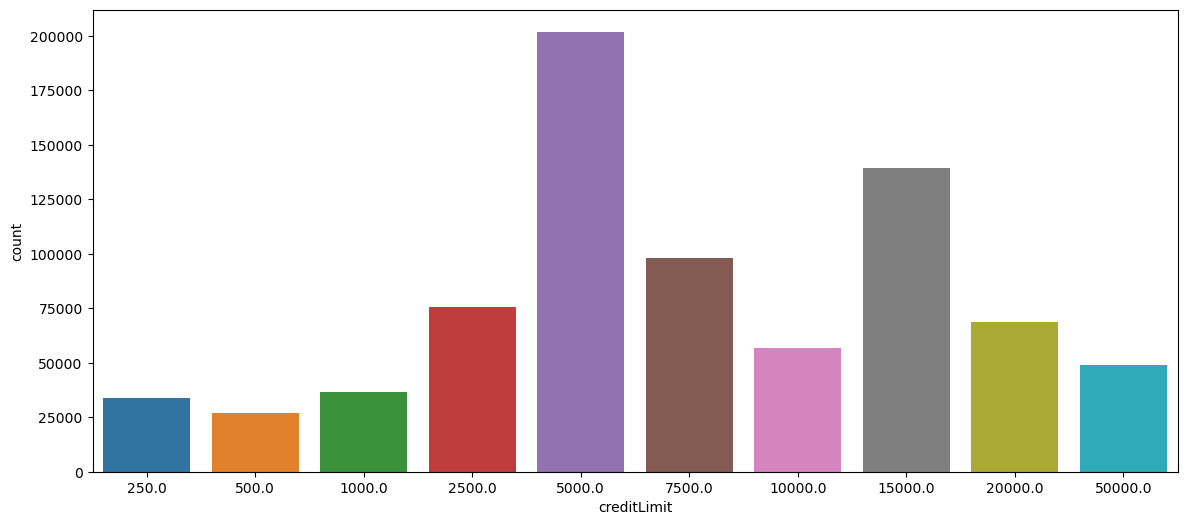

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(df, x='creditLimit');

The above plot may NOT be interpreted as the distribution of credit limit of customers because the dataset consists of transactions and not customer data. For example if Customer A has a credit limit of 5000, and performed 20 transactions, 5000 is repeated 20 times for 1 customer. Therefore to get an accurate measure of distribution, the data should be cleaned to get data of unique customers.

In [15]:
df['merchantCountryCode'].value_counts()

US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64

In [16]:
df['merchantCategoryCode'].value_counts()

online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64

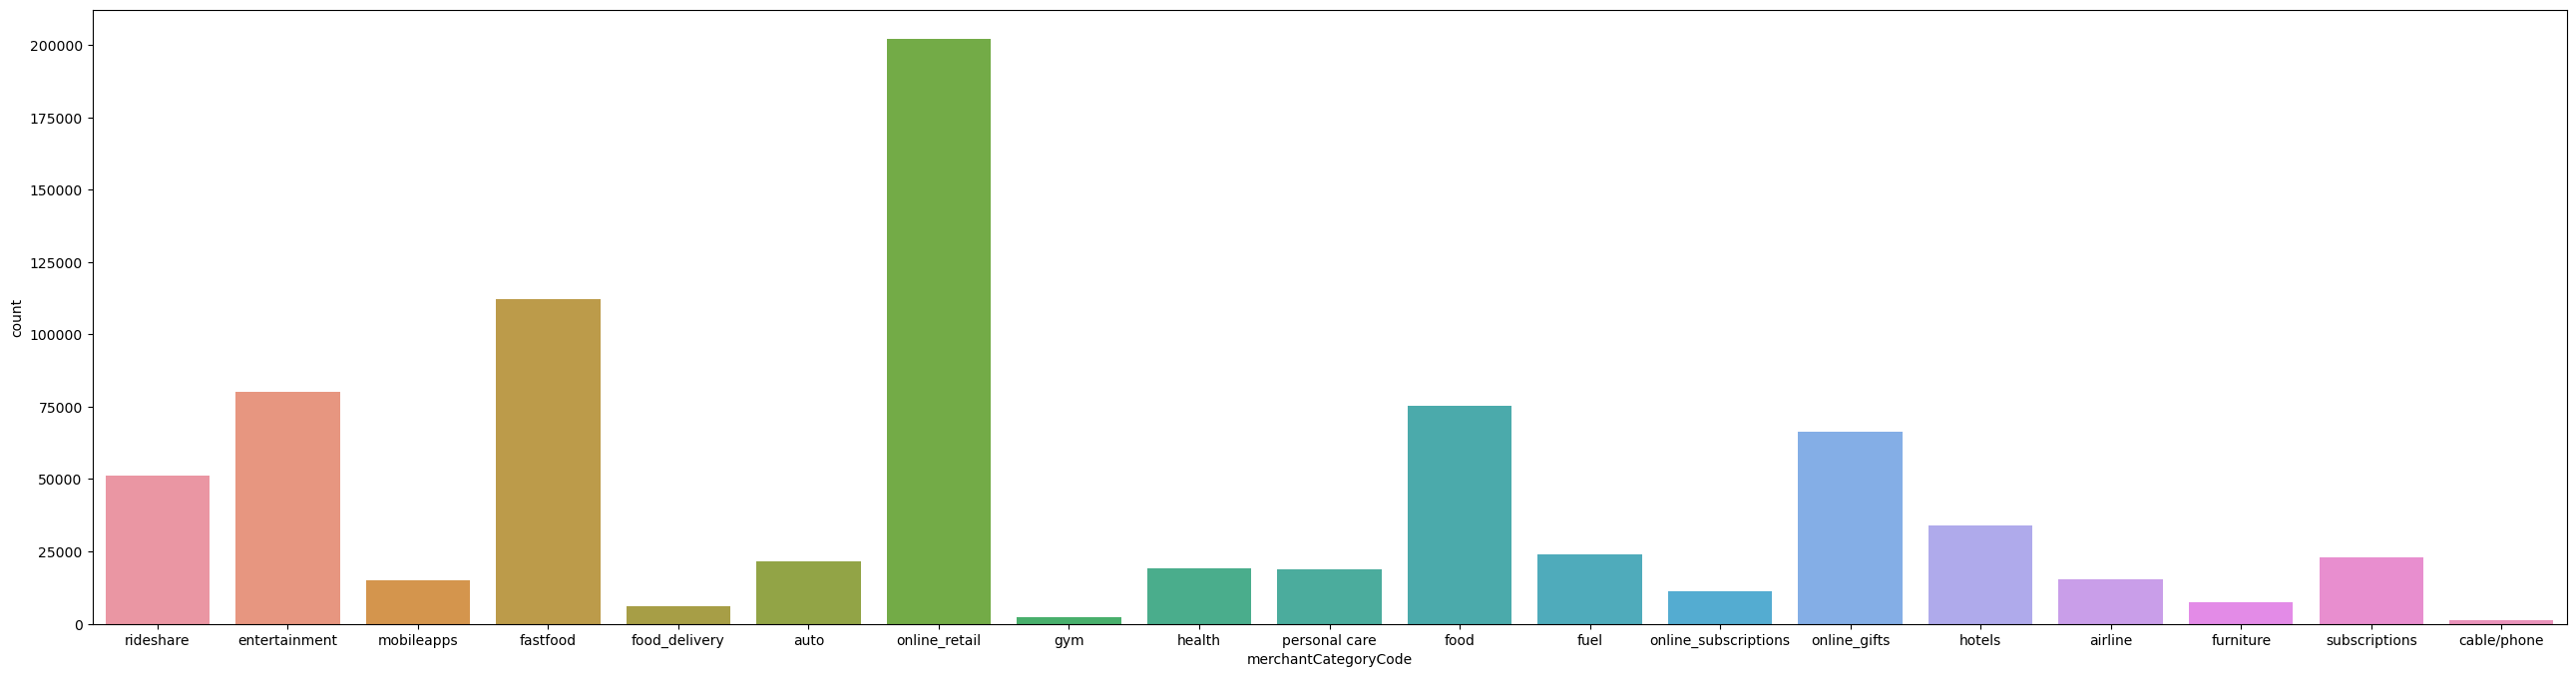

In [17]:
plt.figure(figsize=(32,8))
sns.countplot(df, x='merchantCategoryCode');

In [18]:
df['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

In [19]:
df['isFraud'].value_counts()

False    773946
True      12417
Name: isFraud, dtype: int64